# EDA Univariado y Bivariado – HEXAD Study 2

**Objetivo**: Explorar distribuciones (edad, género, países), porcentajes de motivaciones Hexad y relaciones básicas (edad/género vs rasgos). Incluir fiabilidad (alfa de Cronbach) para sustentar puntajes compuestos.

## Preguntas previo al análisis:
1. ¿Cómo se distribuyen edad, género y países en el estudio?
2. ¿Qué tan consistentes son las escalas Hexad (α de Cronbach)?
3. ¿La edad se relaciona con algún rasgo motivacional?
4. ¿Existen diferencias por género en motivaciones?
5. ¿Qué rasgos co-varían entre sí?


# - Configuración
Ejecuta las celdas en orden.
Coloca tu CSV en `data/dataset-hexad-12-study-2.csv'`

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
PLOTS_DIR = Path('eda_plots'); PLOTS_DIR.mkdir(parents=True, exist_ok=True)
DATA_PATH = Path('data') / 'dataset-hexad-12-study-2.csv'
print('Carpetas listas. DATA_PATH =', DATA_PATH)

Carpetas listas. DATA_PATH = data/dataset-hexad-12-study-2.csv


## 1) Carga y vista general

In [10]:
try:
    df = pd.read_csv(DATA_PATH)
    print('✔ Dataset cargado:', DATA_PATH)
except Exception as e:
    raise SystemExit('No pude cargar el CSV. Asegúrate de que exista en data/.\nError: ' + str(e))

display(df.head())
print('Dimensiones (filas, columnas):', df.shape)
display(df.dtypes)

✔ Dataset cargado: data/dataset-hexad-12-study-2.csv


,token,referral,creationDate,lastUpdate,status,P1,S4,F2,A1,R3,...,hexadType_freeSpirit,hexadType_achiever,hexadType_player,hexadType_disruptor,hexadType_percentage_philanthropist,hexadType_percentage_socializer,hexadType_percentage_freeSpirit,hexadType_percentage_achiever,hexadType_percentage_player,hexadType_percentage_disruptor
0,c5f3064a-f994-4cc7-9af5-68511587516d,facebook,2022-01-06T23:34:26.917Z,2022-01-06T23:36:24.772Z,final,4,1,6,5,1,...,24,17,13,16,57.14,17.86,85.71,60.71,46.43,57.14
1,e094d917-3d5c-4eb5-bcea-a4bbb6f10a7a,facebook,2022-01-07T00:56:40.605Z,2022-01-07T00:57:47.198Z,final,6,4,7,5,7,...,26,22,26,15,78.57,64.29,92.86,78.57,92.86,53.57
2,b899bf70-3871-4e40-a0e6-77cab3c01b27,facebook,2022-01-07T01:22:01.334Z,2022-01-07T01:22:57.540Z,final,7,7,7,6,4,...,25,26,25,13,100.00,96.43,89.29,92.86,89.29,46.43
3,38622d52-9091-4a6b-90a6-fad357775eef,facebook,2022-01-07T01:48:22.519Z,2022-01-07T01:52:44.378Z,final,6,5,6,5,6,...,22,25,23,14,71.43,71.43,78.57,89.29,82.14,50.00
4,ded02e23-7be3-4b77-8c44-28271d878015,facebook,2022-01-07T01:53:22.472Z,2022-01-07T01:56:30.768Z,final,7,5,5,7,6,...,26,22,27,19,82.14,39.29,92.86,78.57,96.43,67.86


Dimensiones (filas, columnas): (1101, 45)


,0
token,object
referral,object
creationDate,object
lastUpdate,object
status,object
P1,int64
S4,int64
F2,int64
A1,int64
R3,int64


## 2) Calidad de datos y saneamiento

In [11]:
na = df.isna().sum().sort_values(ascending=False)
na_pct = (na/len(df)*100).round(2)
display(pd.DataFrame({'faltantes': na, '%': na_pct}).head(15))

df['age_num'] = pd.to_numeric(df.get('age'), errors='coerce')
print('age_num válidos:', df['age_num'].notna().sum())

,faltantes,%
gender,203,18.44
countryOfOrigin_value,103,9.36
countryOfOrigin_label,103,9.36
age,92,8.36
token,0,0.00
P1,0,0.00
S4,0,0.00
F2,0,0.00
A1,0,0.00
referral,0,0.00


age_num válidos: 1009


## 3) Univariado: demografía y rasgos

,age_num
count,1009.000000
mean,31.667988
std,12.579816
min,12.000000
25%,22.000000
50%,28.000000
75%,38.000000
max,84.000000


,count
gender,
male,465
female,395
NaN,203
other,38


,count
countryOfOrigin_label,
United Kingdom of Great Britain and Northern Ireland,451
Australia,159
Canada,149
United States of America,134
New Zealand,56
Ireland,23
Israel,3
Lithuania,2
Malaysia,2


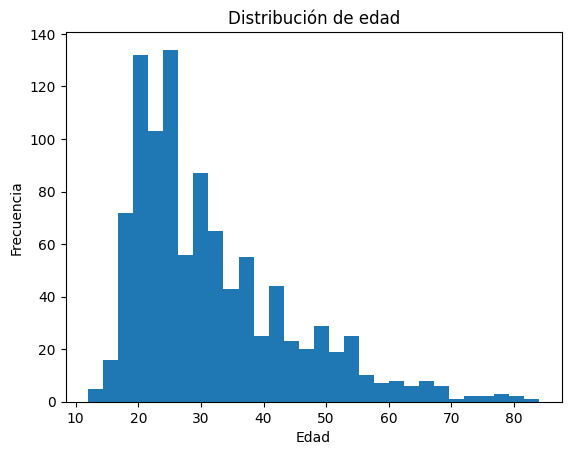

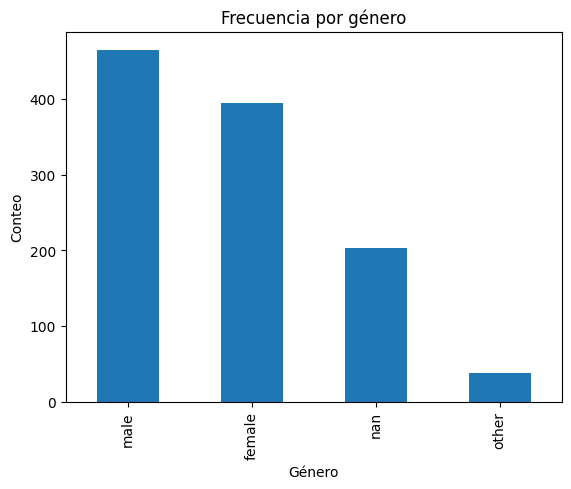

,count,mean,std,min,25%,50%,75%,max
hexadType_percentage_philanthropist,1101.0,83.265232,12.443888,14.29,75.00,85.71,92.86,100.0
hexadType_percentage_socializer,1101.0,68.742752,17.904160,14.29,57.14,71.43,82.14,100.0
hexadType_percentage_freeSpirit,1101.0,79.340300,12.123985,14.29,71.43,78.57,89.29,100.0
hexadType_percentage_achiever,1101.0,82.824160,12.320449,14.29,75.00,85.71,92.86,100.0
hexadType_percentage_player,1101.0,80.705840,13.341878,14.29,75.00,82.14,89.29,100.0
hexadType_percentage_disruptor,1101.0,54.677729,16.625537,14.29,42.86,53.57,67.86,100.0


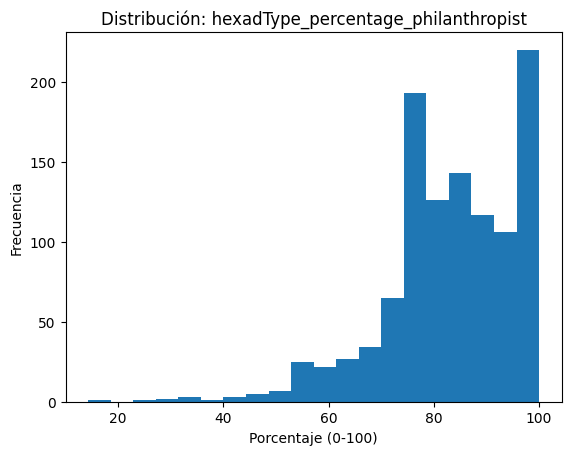

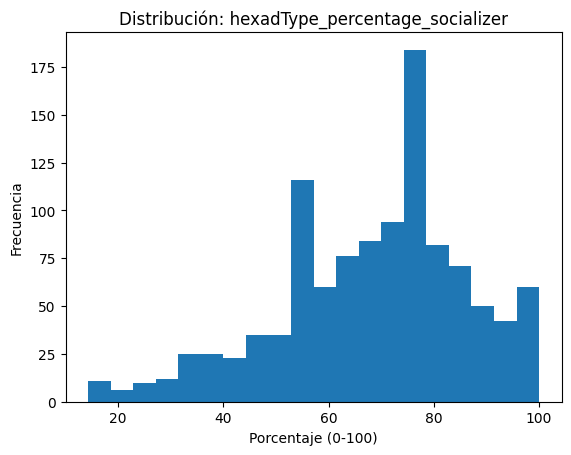

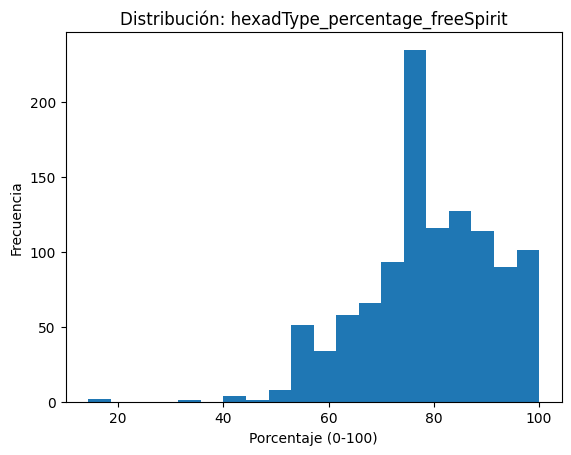

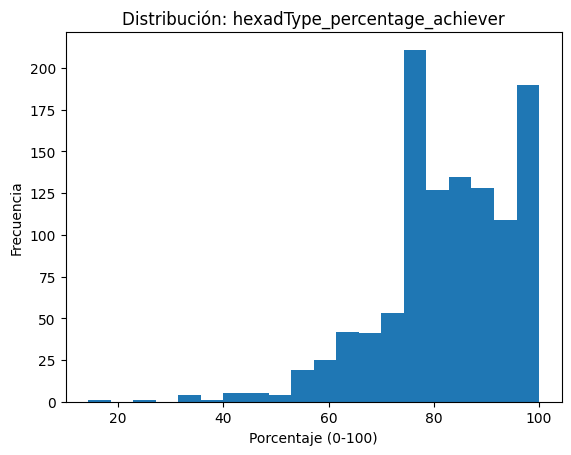

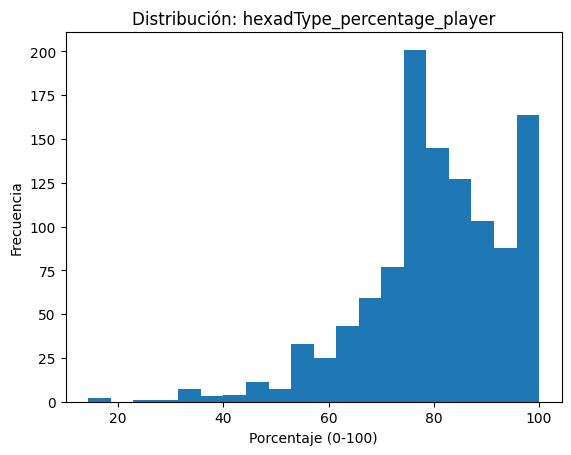

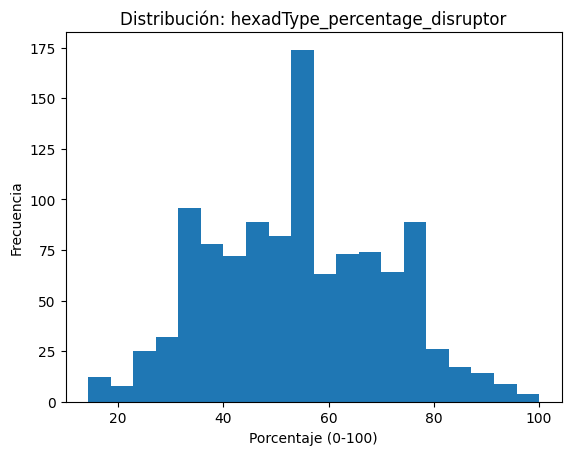

In [12]:
display(df['age_num'].describe())
display(df['gender'].value_counts(dropna=False))
display(df['countryOfOrigin_label'].value_counts())

plt.figure(); df['age_num'].dropna().plot(kind='hist', bins=30)
plt.title('Distribución de edad'); plt.xlabel('Edad'); plt.ylabel('Frecuencia')
plt.savefig(PLOTS_DIR / 'hist_edad.png', bbox_inches='tight'); plt.show()

plt.figure(); df['gender'].value_counts(dropna=False).plot(kind='bar')
plt.title('Frecuencia por género'); plt.xlabel('Género'); plt.ylabel('Conteo')
plt.savefig(PLOTS_DIR / 'bar_genero.png', bbox_inches='tight'); plt.show()

perc_cols = [c for c in df.columns if c.startswith('hexadType_percentage_')]
display(df[perc_cols].describe().T)
for c in perc_cols:
    plt.figure(); df[c].dropna().plot(kind='hist', bins=20)
    plt.title(f'Distribución: {c}'); plt.xlabel('Porcentaje (0-100)'); plt.ylabel('Frecuencia')
    plt.savefig(PLOTS_DIR / f'hist_{c}.png', bbox_inches='tight'); plt.show()

## 4) Puntajes por rasgo y fiabilidad (alfa de Cronbach)

In [13]:
def cronbach_alpha(df_items):
    df_items = df_items.dropna()
    k = df_items.shape[1]
    if k < 2:
        return np.nan
    variances = df_items.var(axis=0, ddof=1)
    total_var = df_items.sum(axis=1).var(ddof=1)
    if total_var == 0:
        return np.nan
    return (k/(k-1))*(1 - variances.sum()/total_var)

traits = {'A': 'achiever', 'D': 'disruptor', 'F': 'freeSpirit', 'P': 'philanthropist', 'R': 'player', 'S': 'socializer'}
items_by_trait = {t: [f"{t}{i}" for i in range(1,5)] for t in traits.keys()}

alphas = {}
for prefix, cols in items_by_trait.items():
    trait = traits[prefix]
    sum_col = f'{trait}_sum4'
    df[sum_col] = df[cols].sum(axis=1, min_count=1)
    alphas[trait] = cronbach_alpha(df[cols])

alphas

{'achiever': np.float64(0.7519725303560074),
 'disruptor': np.float64(0.6601766845766495),
 'freeSpirit': np.float64(0.6014368607974949),
 'philanthropist': np.float64(0.7731167016937741),
 'player': np.float64(0.6752517871533203),
 'socializer': np.float64(0.826339347452852)}

## 5) Bivariado: correlaciones y comparaciones por grupos

,hexadType_percentage_philanthropist,hexadType_percentage_socializer,hexadType_percentage_freeSpirit,hexadType_percentage_achiever,hexadType_percentage_player,hexadType_percentage_disruptor,achiever_sum4,disruptor_sum4,freeSpirit_sum4,philanthropist_sum4,player_sum4,socializer_sum4
hexadType_percentage_philanthropist,1.00,0.54,0.24,0.32,0.17,-0.04,0.32,-0.04,0.24,1.00,0.17,0.54
hexadType_percentage_socializer,0.54,1.00,0.10,0.28,0.18,-0.05,0.28,-0.05,0.10,0.54,0.18,1.00
hexadType_percentage_freeSpirit,0.24,0.10,1.00,0.43,0.21,0.45,0.43,0.45,1.00,0.24,0.21,0.10
hexadType_percentage_achiever,0.32,0.28,0.43,1.00,0.30,0.20,1.00,0.20,0.43,0.32,0.30,0.28
hexadType_percentage_player,0.17,0.18,0.21,0.30,1.00,0.05,0.30,0.05,0.21,0.17,1.00,0.18
hexadType_percentage_disruptor,-0.04,-0.05,0.45,0.20,0.05,1.00,0.20,1.00,0.45,-0.04,0.05,-0.05
achiever_sum4,0.32,0.28,0.43,1.00,0.30,0.20,1.00,0.20,0.43,0.32,0.30,0.28
disruptor_sum4,-0.04,-0.05,0.45,0.20,0.05,1.00,0.20,1.00,0.45,-0.04,0.05,-0.05
freeSpirit_sum4,0.24,0.10,1.00,0.43,0.21,0.45,0.43,0.45,1.00,0.24,0.21,0.10
philanthropist_sum4,1.00,0.54,0.24,0.32,0.17,-0.04,0.32,-0.04,0.24,1.00,0.17,0.54


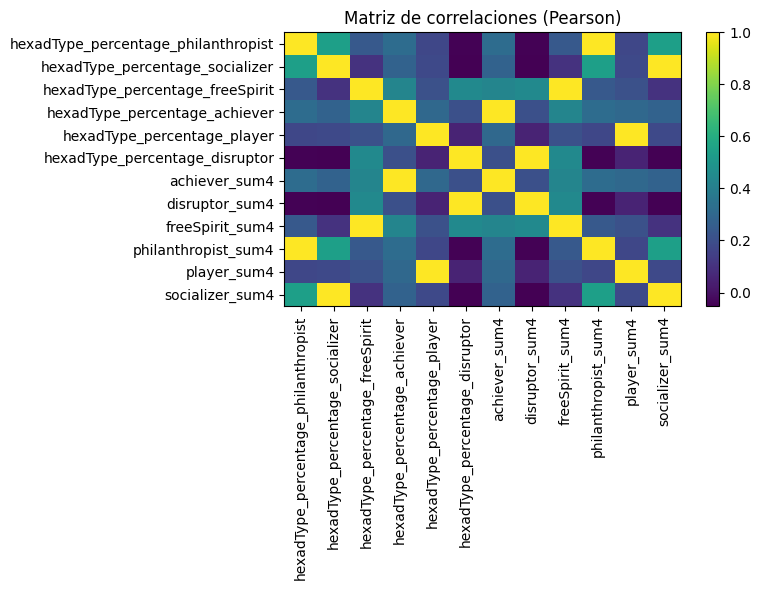

In [14]:
# 5.1 Correlaciones entre rasgos
# Incluye porcentajes y sumas de 4 ítems


targets = [c for c in df.columns if c.startswith('hexadType_percentage_')] \
        + [c for c in df.columns if c.endswith('_sum4')]

if targets:
    corr = df[targets].corr(method='pearson')
    display(corr.round(2))

    plt.figure(figsize=(8,6))
    plt.imshow(corr, aspect='auto', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Matriz de correlaciones (Pearson)")
    plt.tight_layout()
    plt.savefig(PLOTS_DIR / "correlaciones_heatmap.png", bbox_inches="tight")
    plt.show()
else:
    print("No encontré columnas de porcentajes o sumas de 4 ítems para correlaciones.")




Correlación de cada rasgo con la edad:


,age_num
hexadType_percentage_socializer,-0.112804
hexadType_percentage_achiever,-0.047207
hexadType_percentage_player,-0.030738
hexadType_percentage_philanthropist,-0.027115
hexadType_percentage_disruptor,0.020610
hexadType_percentage_freeSpirit,0.024183


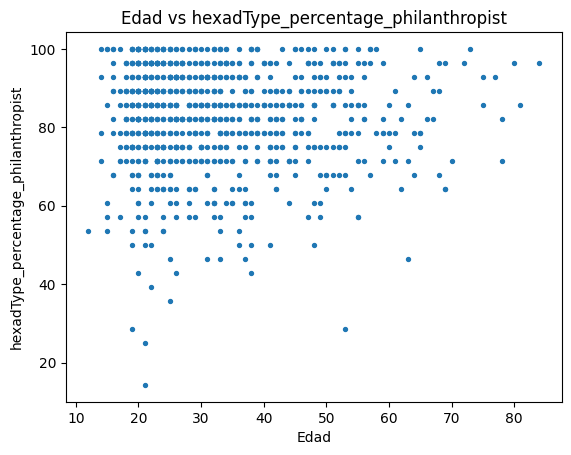

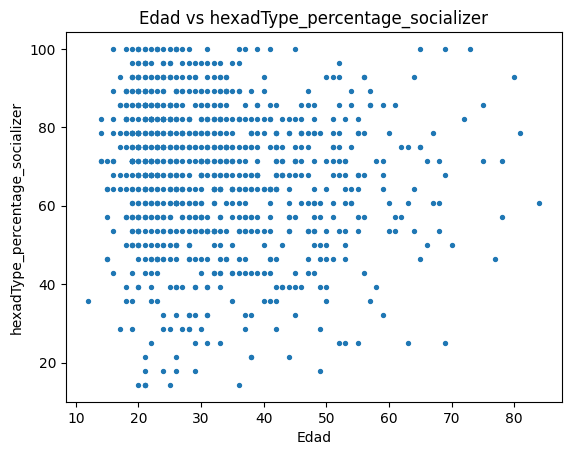

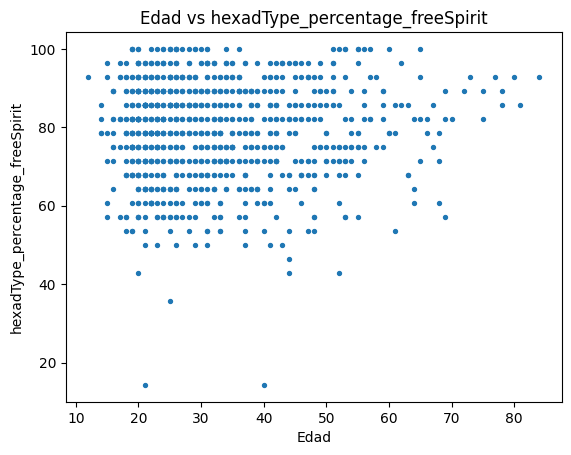

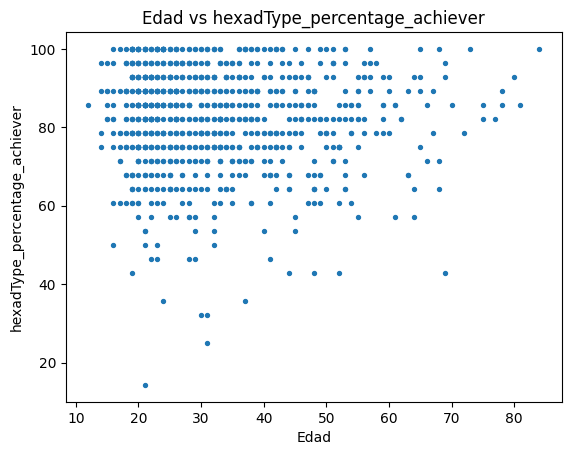

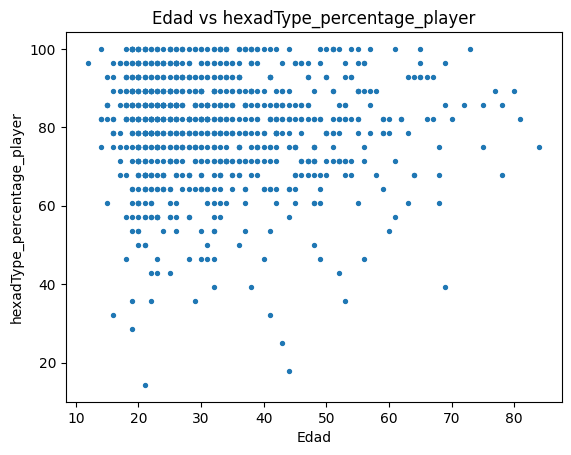

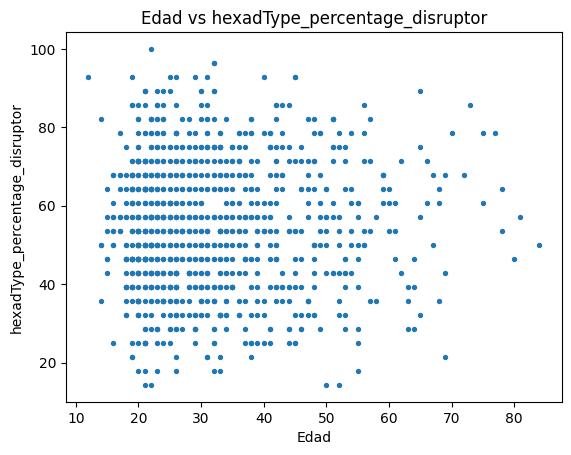

In [15]:
# 5.2 Edad vs Rasgos

if "age_num" not in df.columns and "age" in df.columns:
    df["age_num"] = pd.to_numeric(df["age"], errors="coerce")

if "age_num" in df.columns:
    perc_cols = [c for c in df.columns if c.startswith("hexadType_percentage_")]
    if perc_cols:

        age_corr = df[perc_cols + ["age_num"]].corr().loc["age_num"].drop("age_num").sort_values()
        print("Correlación de cada rasgo con la edad:")
        display(age_corr)

        for c in perc_cols:
            tmp = df[["age_num", c]].dropna()
            if not tmp.empty:
                plt.figure()
                plt.scatter(tmp["age_num"], tmp[c], s=8)
                plt.xlabel("Edad")
                plt.ylabel(c)
                plt.title(f"Edad vs {c}")
                plt.savefig(PLOTS_DIR / f"scatter_edad_{c}.png", bbox_inches="tight")
                plt.show()
else:
    print("No se encontró la columna de edad.")



Promedios por género (porcentajes de rasgos):


,hexadType_percentage_philanthropist,hexadType_percentage_socializer,hexadType_percentage_freeSpirit,hexadType_percentage_achiever,hexadType_percentage_player,hexadType_percentage_disruptor
gender,,,,,,
female,84.56,69.32,79.77,81.27,81.83,51.70
male,81.65,67.83,78.69,84.12,80.26,56.80
other,81.86,65.32,84.68,82.33,78.76,61.28


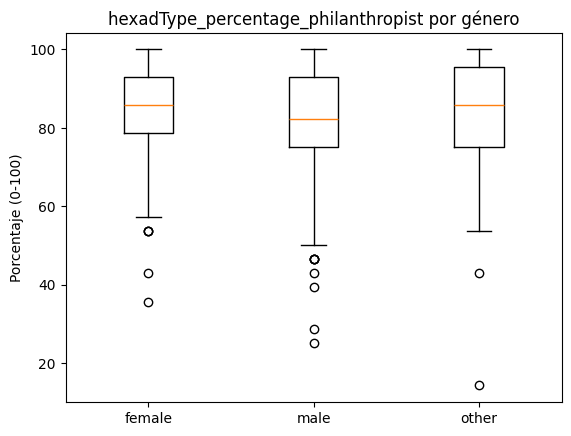

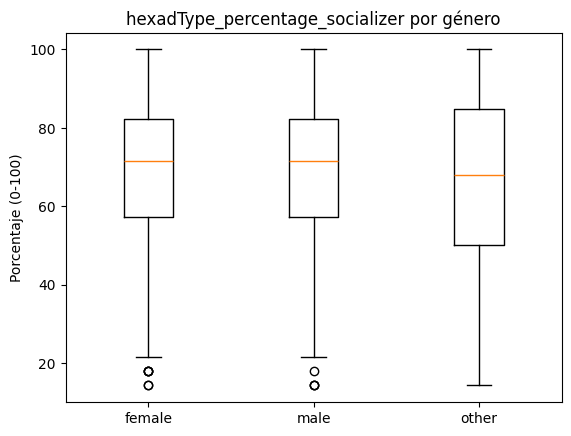

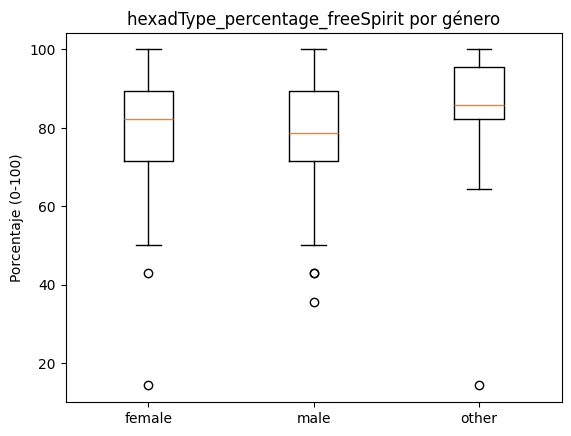

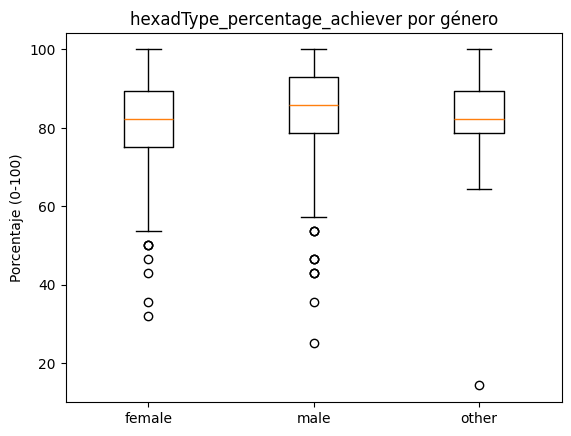

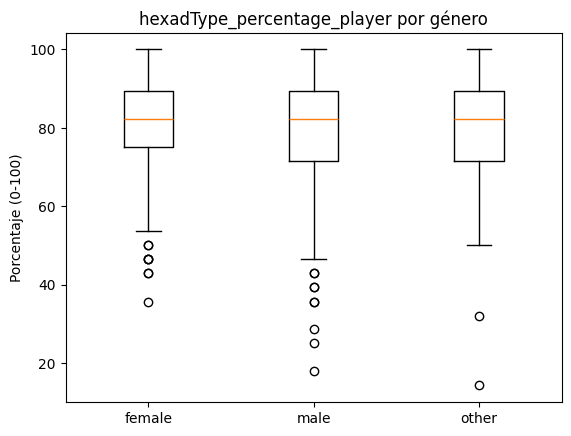

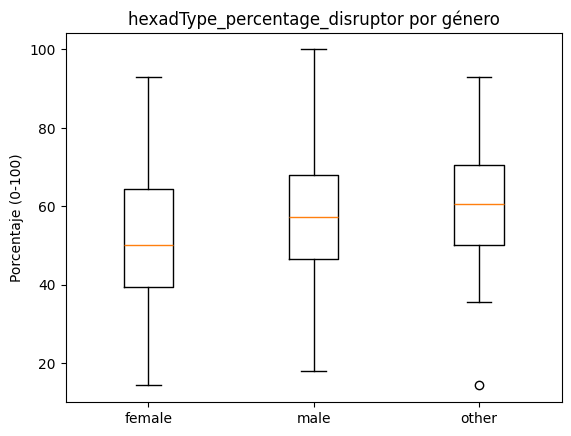

In [16]:
if "gender" in df.columns:
    perc_cols = [c for c in df.columns if c.startswith("hexadType_percentage_")]
    if perc_cols:

        means_by_gender = df.groupby("gender")[perc_cols].mean().round(2)
        print("Promedios por género (porcentajes de rasgos):")
        display(means_by_gender)

        for c in perc_cols:
            tmp = df[["gender", c]].dropna()
            if not tmp.empty:
                groups = [g[c].values for _, g in tmp.groupby("gender")]
                labels = [str(name) for name,_ in tmp.groupby("gender")]
                if len(groups) >= 2:
                    plt.figure()
                    plt.boxplot(groups, tick_labels=labels)
                    plt.title(f"{c} por género")
                    plt.ylabel("Porcentaje (0-100)")
                    plt.savefig(PLOTS_DIR / f"box_{c}_por_genero.png", bbox_inches="tight")
                    plt.show()
else:
    print("No encontré columna de género.")


## 6) Interpretación
- **Análisis Univariado**:
  - **Distribución de edad**: Muestra una distribución centrada en los 20–40 años, con media aproximada de 32. Lo que significa que la muestra es principalmente de adultos jóvenes.
  - **Frecuencia por genero**: La mayoría destaca entre hombres y mujeres sin olvidar algunos valores other y los NaN.
  - **Histogramas de cada rasgo**: en resumen, muestra la distribución de los participantes en cada rasgo".
- **Análisis Bivariado**:
  - **Correlaciones**: se observa que los rasgos "socializer" y "Philanthropist" correlacionan, lo que implica que estos perfiles motivacionales se refuerzan mutuamente.
  - **Correlación de cada rasgo con la edad**: Todas las correlaciones son bajas lo que implica que la edad no influye tanto, aunque la única señal más clara es el rasgo "Socializer" que indica que los jóvenes parecen valorar más lo social, pero aun así es un efecto pequeño.
  - **Promedios por género (porcentajes de rasgos)**: Muestran diferencias pequeñas a moderadas, mientras que las mujeres tienden a puntuar algo más alto en "Socializer" y los hombres en "Disrupto"r y "Free Spirit". En "Philanthropist", "Achiever" y "Player" las distribuciones son muy similares.



## 7) Resolusión de preguntas

- **Pregunta 1**: ¿Cómo se distribuyen edad, género y países en la muestra?
  - El estudio está compuesto mayoritariamente por adultos jóvenes (20–40), con predominio de géneros masculino y femenino, y países angloparlantes.


- **Pregunta 2**: ¿Qué tan consistentes son las escalas Hexad (α de Cronbach)?
  - Las escalas presentan consistencia aceptable (α de aproximadamente 0.75–0.83) excepto Free Spirit (α de aproximadamente 0.60), que tiene ciertas incongruencias.

- **Pregunta 3**: ¿La edad se relaciona con algún rasgo motivacional?
  - Sí, pero débilmente. Se observaron correlaciones bajas (aproximadamente entre 0.1–0.2).
  **Ejemplo**: personas mayores tienden a puntuar más en Achiever y menos en Disruptor.

- **Pregunta 4**: ¿Existen diferencias por género en motivaciones?
  - Se observan diferencias pequeñas a moderadas, mientras que las mujeres puntuan algo más alto en "Socializer", los hombres puntuan algo más alto en "Disruptor" y "Free Spirit". Los boxplots muestran fuerte solapamiento.

- **Pregunta 5**: ¿Qué rasgos co-varían entre sí?
  - Los rasgos "Philanthropist" y "Socializer" co-varían positivamente, sugiriendo un perfil social–prosocial; el resto de asociaciones son menores.
